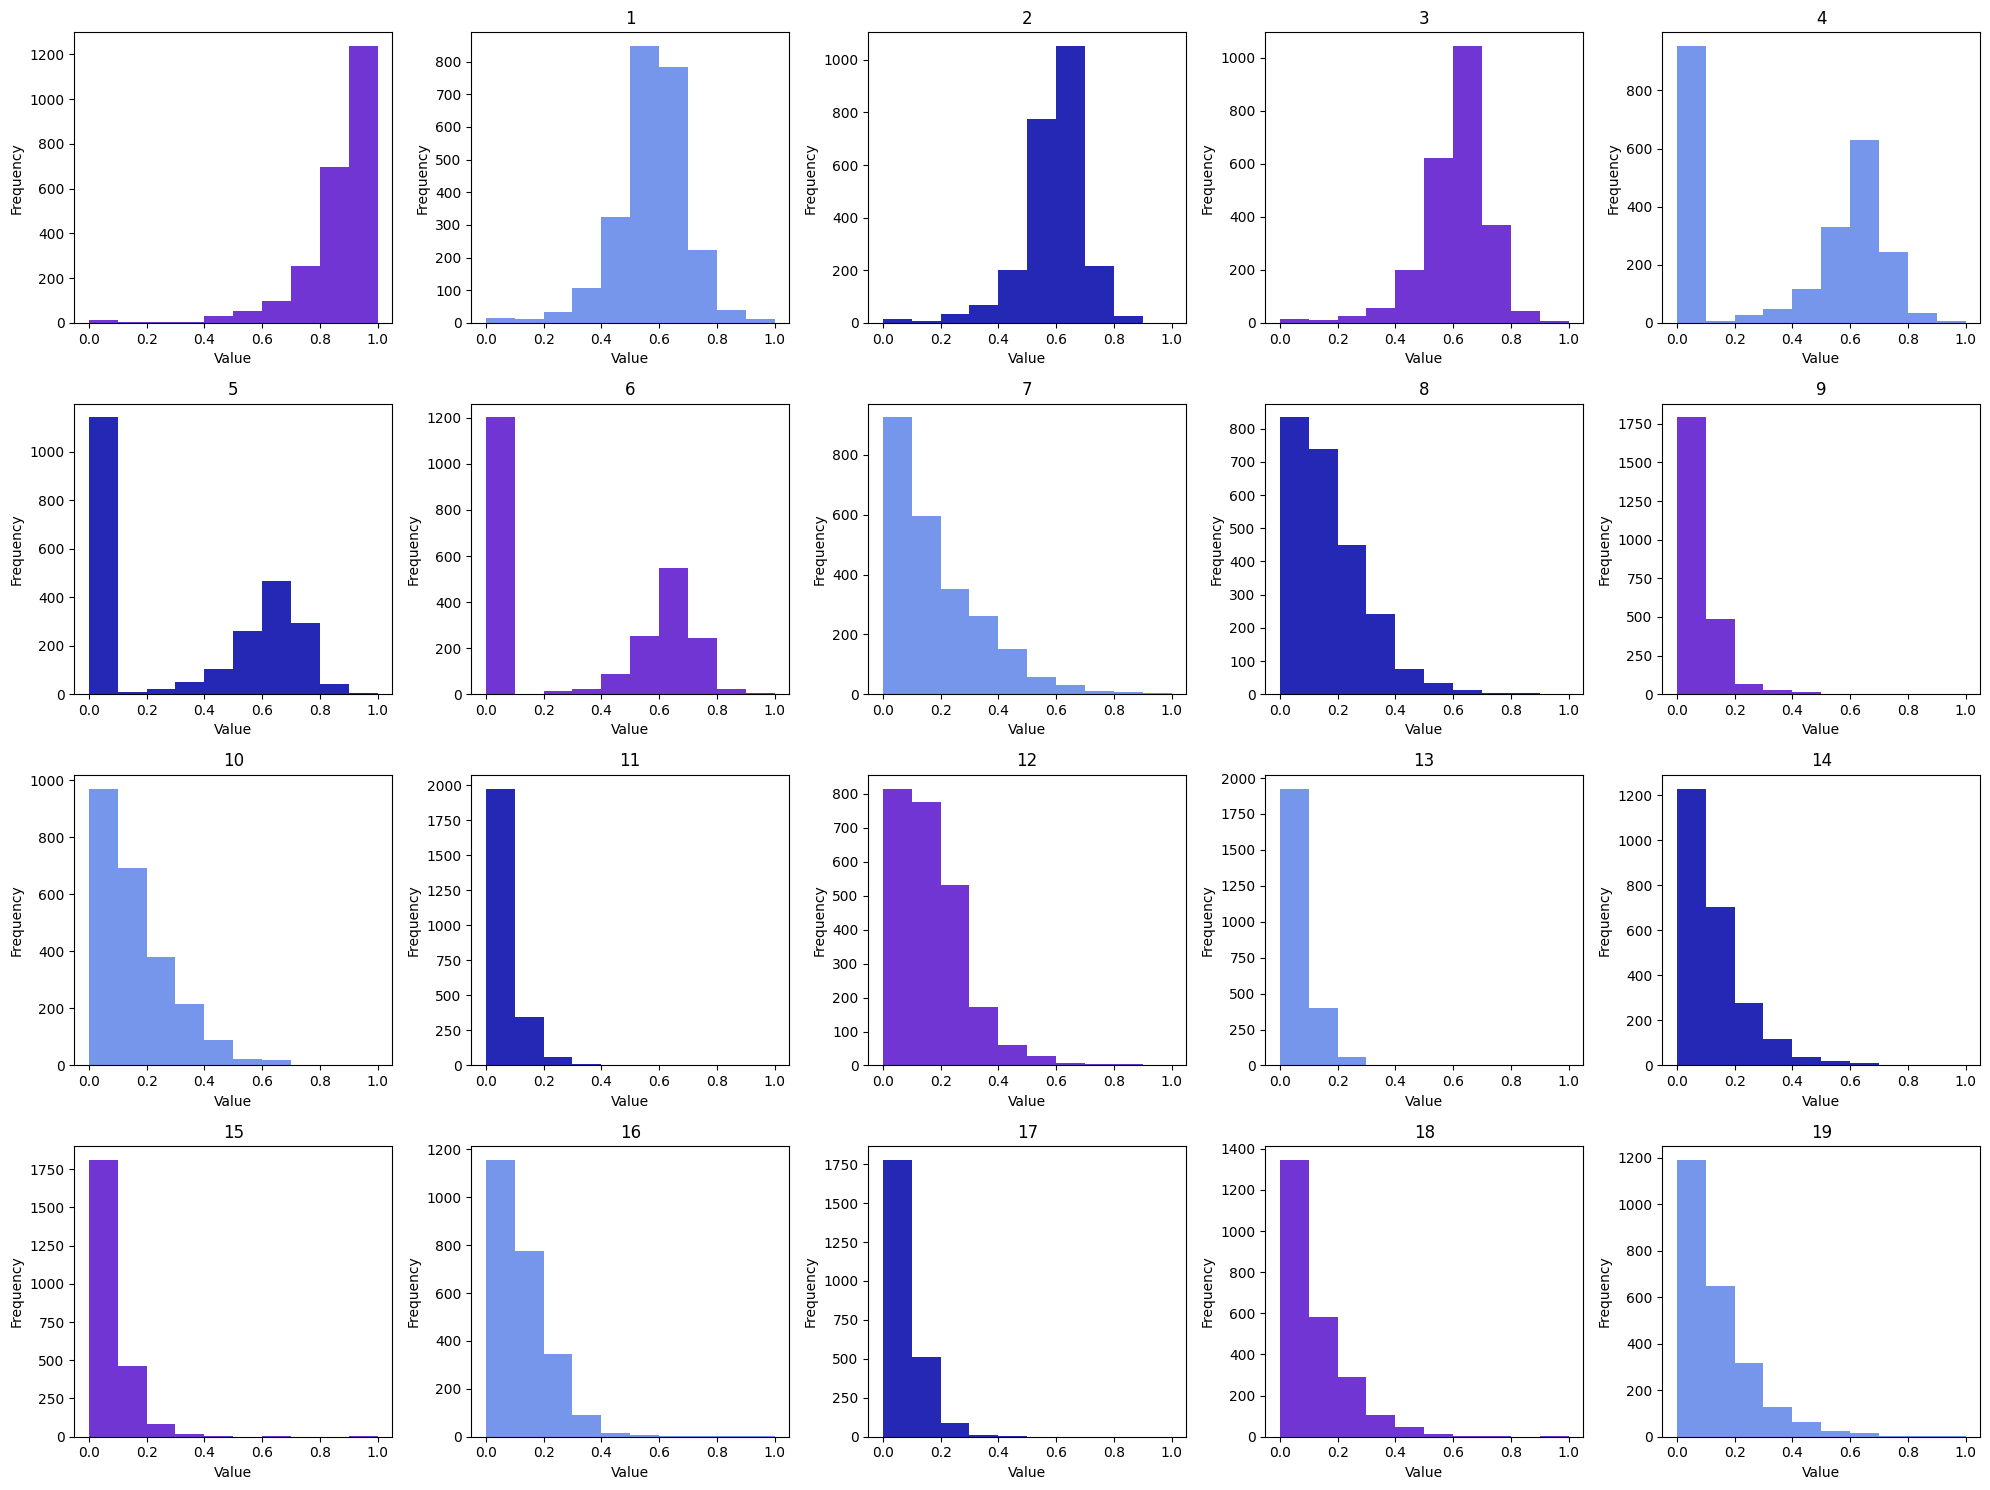

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("descriptores/descriptores_completos_normalizados.csv", header=None)

num_rows = 4
num_cols = 5
num_plots = num_rows * num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
custom_colors = ['#7035d3', '#7696eb', '#2528b5']
for idx, ax in enumerate(axes.flat):
    col_idx = idx % len(df.columns)
    df[df.columns[col_idx]].plot(kind='hist', ax=ax, title=df.columns[col_idx], color=custom_colors[col_idx % len(custom_colors)])
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()


In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import KFold

df = pd.read_csv("descriptores/descriptores_completos_normalizados.csv", header=None)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
def primera_capa(): 
    num_features = X.shape[1]
    for epocas in range(20, 120, 20):
        for c in range (3,16):
            i = 0.2
            while i < 1:
                j = 0.5
                while j < 1:
                    entrada = tf.keras.Input(shape=(num_features,))
                    salida = tf.keras.layers.Dense(c,activation="softmax")(entrada)
                    model= tf.keras.Model(inputs = entrada,outputs = salida)



                    optimizer = tf.keras.optimizers.SGD(learning_rate=j, momentum=i)
                    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
                    num_folds = 20

                    kf = KFold(n_splits=num_folds)

                    fold_accs = []

                    for train_index, val_index in kf.split(X):
                        X_train, X_val = X[train_index], X[val_index]
                        y_train, y_val = y[train_index], y[val_index]


                        model.fit(X_train, y_train, epochs=epocas, verbose=0)
                        _, fold_acc = model.evaluate(X_val, y_val, verbose=0)
                        fold_accs.append(fold_acc)
                    mean_acc = np.mean(fold_accs)
                    with open("resultados_model_primera.csv", "a") as file:
                        file.write(f"{epocas},{c}, {i}, {j}, {mean_acc}\n")
                    print(epocas,c,i, j)

                    j += 0.5
                i += 0.2
            c = c+ 1

In [4]:
def segunda_capa(X,y):
    num_features = X.shape[1]
    epocas = 100
    for c in range (3,16):
            i = 0.2
            while i < 1:
                j = 0.1
                while j < 1:
                    
                    entrada = tf.keras.Input(shape=(num_features,))
                    oculta = tf.keras.layers.Dense(c, activation='softmax')(entrada)
                    salida = tf.keras.layers.Dense(3, activation='softmax')(oculta)
                    model = tf.keras.Model(inputs=entrada, outputs=salida)

                    optimizer = tf.keras.optimizers.SGD(learning_rate=j, momentum=i)
                    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
                    num_folds = 15

                    kf = KFold(n_splits=num_folds)

                    fold_accs = []

                    for train_index, val_index in kf.split(X):
                        X_train, X_val = X[train_index], X[val_index]
                        y_train, y_val = y[train_index], y[val_index]


                        model.fit(X_train, y_train, epochs=epocas, verbose=0)
                        _, fold_acc = model.evaluate(X_val, y_val, verbose=0)
                        fold_accs.append(fold_acc)
                    mean_acc = np.mean(fold_accs)
                    with open("resultados_model_segunda.csv", "a") as file:
                        file.write(f"{epocas},{c}, {i}, {j}, {mean_acc}\n")
                    print(epocas,c,i, j)

                    j += 0.1
                i += 0.2
            c = c+ 1

In [ ]:
def segunda_capa(X,y):
    num_features = X.shape[1]
    epocas = 100
    for c in range (3,16):
            i = 0.2
            while i < 1:
                j = 0.1
                while j < 1:
                    
                    entrada = tf.keras.Input(shape=(num_features,))
                    oculta1 = tf.keras.layers.Dense(c, activation='softmax')(entrada)
                    oculta2 = tf.keras.layers.Dense(c, activation='softmax')(oculta1)
                    salida = tf.keras.layers.Dense(3, activation='softmax')(oculta2)
                    model = tf.keras.Model(inputs=entrada, outputs=salida)

                    optimizer = tf.keras.optimizers.SGD(learning_rate=j, momentum=i)
                    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
                    num_folds = 15

                    kf = KFold(n_splits=num_folds)

                    fold_accs = []

                    for train_index, val_index in kf.split(X):
                        X_train, X_val = X[train_index], X[val_index]
                        y_train, y_val = y[train_index], y[val_index]


                        model.fit(X_train, y_train, epochs=epocas, verbose=0)
                        _, fold_acc = model.evaluate(X_val, y_val, verbose=0)
                        fold_accs.append(fold_acc)
                    mean_acc = np.mean(fold_accs)
                    with open("resultados_model_segunda.csv", "a") as file:
                        file.write(f"{epocas},{c}, {i}, {j}, {mean_acc}\n")
                    print(epocas,c,i, j)

                    j += 0.1
                i += 0.2
            c = c+ 1

In [9]:
segunda_capa(X,y)

100 3 0.2 0.1
100 3 0.2 0.2
100 3 0.2 0.30000000000000004
100 3 0.2 0.4
100 3 0.2 0.5
100 3 0.2 0.6
100 3 0.2 0.7
100 3 0.2 0.7999999999999999
100 3 0.2 0.8999999999999999
100 3 0.2 0.9999999999999999
100 3 0.4 0.1
100 3 0.4 0.2
100 3 0.4 0.30000000000000004
100 3 0.4 0.4
100 3 0.4 0.5
100 3 0.4 0.6
100 3 0.4 0.7
100 3 0.4 0.7999999999999999
100 3 0.4 0.8999999999999999
100 3 0.4 0.9999999999999999
100 3 0.6000000000000001 0.1
100 3 0.6000000000000001 0.2
100 3 0.6000000000000001 0.30000000000000004
100 3 0.6000000000000001 0.4
100 3 0.6000000000000001 0.5
100 3 0.6000000000000001 0.6
100 3 0.6000000000000001 0.7
100 3 0.6000000000000001 0.7999999999999999
100 3 0.6000000000000001 0.8999999999999999
100 3 0.6000000000000001 0.9999999999999999
100 3 0.8 0.1
100 3 0.8 0.2
100 3 0.8 0.30000000000000004
100 3 0.8 0.4
100 3 0.8 0.5
100 3 0.8 0.6
100 3 0.8 0.7
100 3 0.8 0.7999999999999999
100 3 0.8 0.8999999999999999
100 3 0.8 0.9999999999999999
100 4 0.2 0.1
100 4 0.2 0.2
100 4 0.2 0.300000

KeyboardInterrupt: 

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import KFold

# Leer el dataset desde un archivo CSV
df = pd.read_csv("descriptores/descriptores_completos_normalizados.csv", header=None)

# Obtener características (X) y etiquetas (y) del DataFrame
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
c= 11
epocas = 100
j = 0.899
i = 0.8
num_features = X.shape[1]
entrada = tf.keras.Input(shape=(num_features,))
oculta = tf.keras.layers.Dense(c, activation='softmax')(entrada)
salida = tf.keras.layers.Dense(3, activation='softmax')(oculta)
model = tf.keras.Model(inputs=entrada, outputs=salida)


optimizer = tf.keras.optimizers.SGD(learning_rate=j, momentum=i)


model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
num_folds = 15

kf = KFold(n_splits=num_folds)

fold_accs = []

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]


    model.fit(X_train, y_train, epochs=epocas, verbose=0)
    _, fold_acc = model.evaluate(X_val, y_val, verbose=0)
    fold_accs.append(fold_acc)
    print(epocas,c,i, j,fold_acc)
mean_acc = np.mean(fold_accs)
print(epocas,c,i, j,mean_acc)


100 11 0.8 0.899 0.5687500238418579
100 11 0.8 0.899 0.8374999761581421
100 11 0.8 0.899 0.9437500238418579
100 11 0.8 0.899 0.9437500238418579
100 11 0.8 0.899 0.90625
100 11 0.8 0.899 0.8812500238418579
100 11 0.8 0.899 0.887499988079071
100 11 0.8 0.899 0.862500011920929
100 11 0.8 0.899 0.8999999761581421
100 11 0.8 0.899 0.9125000238418579
100 11 0.8 0.899 0.824999988079071
100 11 0.8 0.899 0.90625
100 11 0.8 0.899 0.893081784248352
100 11 0.8 0.899 0.8616352081298828
100 11 0.8 0.899 0.7861635088920593
100 11 0.8 0.899 0.8610587040583293


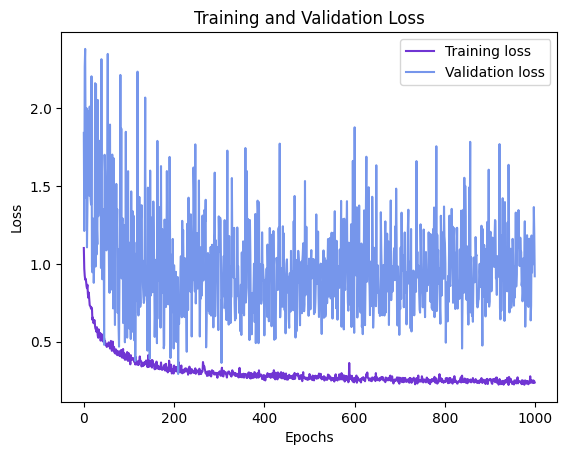

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8605 - loss: 0.3736 
Test Loss: 0.40204718708992004
Test Accuracy: 0.862500011920929


In [103]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv("descriptores/descriptores_completos_normalizados.csv", header=None)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

c = 11
epocas = 1000
j = 0.8999
i = 0.8

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

entrada = tf.keras.Input(shape=(num_features,))
oculta = tf.keras.layers.Dense(c, activation='softmax')(entrada)
salida = tf.keras.layers.Dense(c, activation='softmax')(oculta)
model = tf.keras.Model(inputs=entrada, outputs=salida)

optimizer = tf.keras.optimizers.SGD(learning_rate=j, momentum=i)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X, y, epochs=epocas, validation_split=0.2, verbose=0)

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot( train_loss,  label='Training loss', color='#7035d3')
plt.plot( val_loss, label='Validation loss', color='#7696eb')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


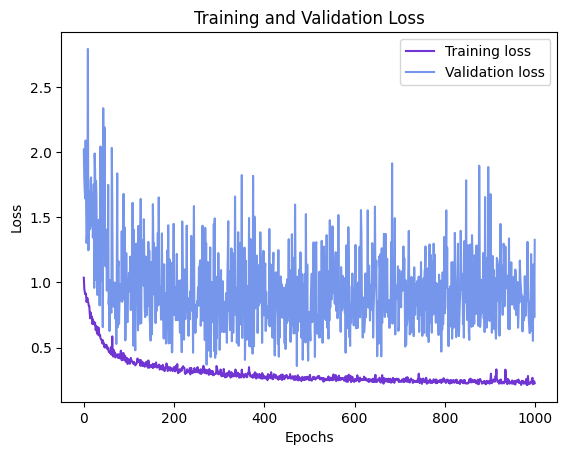

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.8482 - loss: 0.5030
Test Loss: 0.5071284770965576
Test Accuracy: 0.84375


In [104]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv("descriptores/descriptores_completos_normalizados.csv", header=None)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

c = 11
epocas = 1000
j = 0.8999
i = 0.8

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

entrada = tf.keras.Input(shape=(num_features,))
oculta = tf.keras.layers.Dense(c, activation='softmax')(entrada)
salida = tf.keras.layers.Dense(3, activation='softmax')(oculta)
model = tf.keras.Model(inputs=entrada, outputs=salida)

optimizer = tf.keras.optimizers.SGD(learning_rate=j, momentum=i)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X, y, epochs=epocas, validation_split=0.2, verbose=0)

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot( train_loss,  label='Training loss', color='#7035d3')
plt.plot( val_loss, label='Validation loss', color='#7696eb')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


100 11 0.8 0.8999999 0.45625001192092896
100 11 0.8 0.8999999 0.8062499761581421
100 11 0.8 0.8999999 0.8500000238418579
100 11 0.8 0.8999999 0.9437500238418579
100 11 0.8 0.8999999 0.856249988079071
100 11 0.8 0.8999999 0.824999988079071
100 11 0.8 0.8999999 0.8812500238418579
100 11 0.8 0.8999999 0.8374999761581421
100 11 0.8 0.8999999 0.8812500238418579
100 11 0.8 0.8999999 0.887499988079071
100 11 0.8 0.8999999 0.8500000238418579
100 11 0.8 0.8999999 0.9125000238418579
100 11 0.8 0.8999999 0.805031418800354
100 11 0.8 0.8999999 0.8742138147354126
100 11 0.8 0.8999999 0.8742138147354126
100 11 0.8 0.8999999 0.8360639413197836


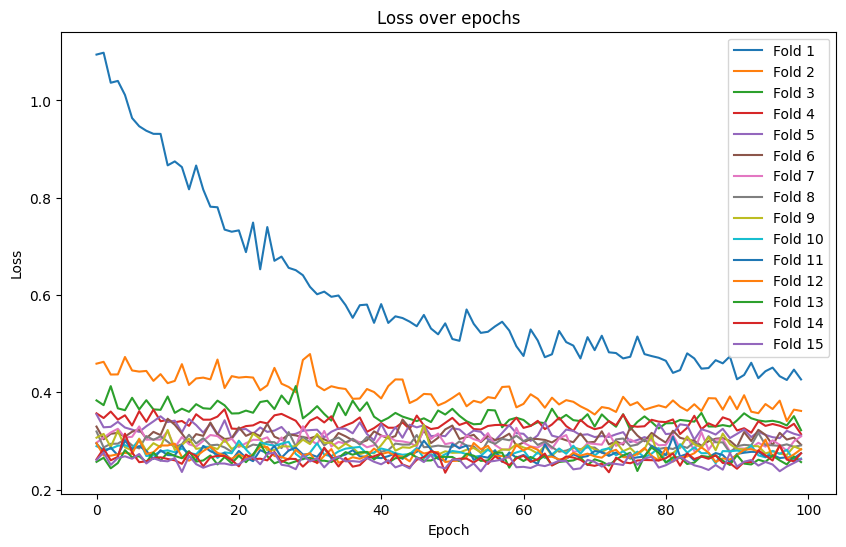

In [105]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

df = pd.read_csv("descriptores/descriptores_completos_normalizados.csv", header=None)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
c= 11
epocas = 100
j = 0.8999999
i = 0.8
num_features = X.shape[1]
entrada = tf.keras.Input(shape=(num_features,))
oculta = tf.keras.layers.Dense(c, activation='softmax')(entrada)
salida = tf.keras.layers.Dense(3, activation='softmax')(oculta)
model = tf.keras.Model(inputs=entrada, outputs=salida)

optimizer = tf.keras.optimizers.SGD(learning_rate=j, momentum=i)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

num_folds = 15
kf = KFold(n_splits=num_folds)

fold_accs = []
fold_losses = []

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    history = model.fit(X_train, y_train, epochs=epocas, verbose=0, validation_data=(X_val, y_val))
    
    fold_loss, fold_acc = model.evaluate(X_val, y_val, verbose=0)
    fold_losses.append(history.history['loss'])
    fold_accs.append(fold_acc)
    print(epocas, c, i, j, fold_acc)

mean_acc = np.mean(fold_accs)
print(epocas, c, i, j, mean_acc)

plt.figure(figsize=(10, 6))
for loss in fold_losses:
    plt.plot(loss)
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Fold 6', 'Fold 7', 'Fold 8', 'Fold 9', 'Fold 10', 'Fold 11', 'Fold 12', 'Fold 13', 'Fold 14', 'Fold 15'], loc='upper right')
plt.show()


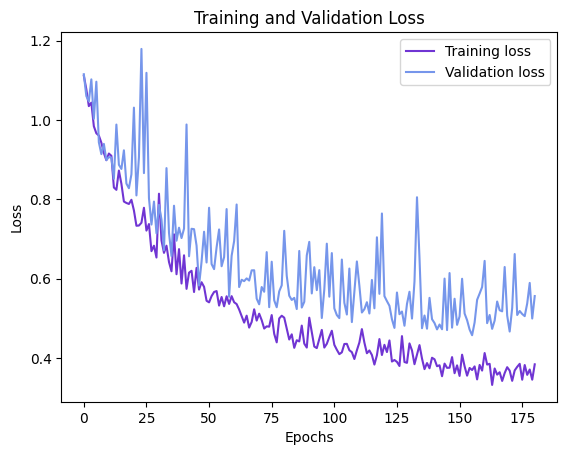

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - accuracy: 0.8023 - loss: 0.4465
Test Loss: 0.4790842831134796
Test Accuracy: 0.8104166388511658
Número de épocas utilizadas: 181


In [124]:
df = pd.read_csv("descriptores/descriptores_completos_normalizados.csv", header=None)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c = 11
j = 0.8999
i = 0.8
num_features = X.shape[1]
epocas_max = 1000

entrada = tf.keras.Input(shape=(num_features,))
oculta = tf.keras.layers.Dense(c, activation='softmax')(entrada)
salida = tf.keras.layers.Dense(3, activation='softmax')(oculta)
model = tf.keras.Model(inputs=entrada, outputs=salida)

optimizer = tf.keras.optimizers.SGD(learning_rate=j, momentum=i)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=25,         
    restore_best_weights=True  
)

history = model.fit(
    X_train, y_train,
    epochs=epocas_max,
    validation_split=0.2,
    callbacks=[early_stopping],  
    verbose=0
)

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Training loss', color='#7035d3')
plt.plot(val_loss, label='Validation loss', color='#7696eb')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
num_epocas_utilizadas = early_stopping.stopped_epoch + 1
print("Número de épocas utilizadas:", num_epocas_utilizadas)


In [101]:
# Obtener los pesos finales de todas las capas
pesos_finales = []
for capa in model.layers:
    pesos_capa = capa.get_weights()
    pesos_finales.append(pesos_capa)

# Visualizar los pesos finales de cada capa
for i, capa in enumerate(model.layers):
    print("Capa:", i+1)
    print("Pesos:")
    print(pesos_finales[i])


Capa: 1
Pesos:
[]
Capa: 2
Pesos:
[array([[ 5.31519461e+00,  7.07849503e+00, -1.55866423e+01,
         5.70050764e+00,  2.68794870e+00,  1.27556002e+00,
        -2.47764215e-01,  1.08565998e+01,  1.45792866e+00,
        -1.32777681e+01, -4.68703461e+00],
       [-1.28767228e+00, -1.33279431e+00,  6.96708488e+00,
        -7.95137510e-03, -1.17686520e+01,  8.74149740e-01,
         5.60957098e+00,  3.85275626e+00, -2.83999276e+00,
         2.49994540e+00, -1.84090984e+00],
       [ 8.60022354e+00,  1.51177225e+01,  5.27963495e+00,
         2.65093017e+00, -1.07966986e+01, -1.64629059e+01,
        -4.91325712e+00,  1.03387156e+01, -7.38596535e+00,
        -2.56873202e+00,  1.00919378e+00],
       [ 4.27291918e+00, -4.67276382e+00, -3.30605507e+00,
        -6.51752576e-02,  1.82606757e+00,  9.15036678e-01,
        -8.83313084e+00,  7.52738333e+00, -8.95251656e+00,
         4.12988424e+00,  5.78223658e+00],
       [ 8.98781896e-01, -1.97469902e+00, -2.45474279e-02,
        -1.29022253e+00, -4